In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import datetime

In [5]:
data=pd.read_json("data.json")

In [8]:
data["text"][0]

'\r\n\r\nРазработчик бесплатного дополнения VS Code Stories Бен Авад (Ben Awad) рассказал, что принял решение расстаться с проектом почти сразу после его запуска. Оказалось, что он слишком понадеялся на честность и понимание пользователей, и не учел их темную сторону в API проекта, который, по словам автора, очень простой. \r\n\r\nБен Авад пояснил, что после первого боевого запуска сервера проекта все шло замечательно — программисты регистрировались и публиковали в историях гифки со своим кодом. Потом начались проблемы. \r\n\r\nНекоторые пользователи начали публиковать откровенные картинки, включая порнографические изображения. Через некоторое время почти все истории превратились в порно инсталляции.\r\n\r\nБен Авад отключил сервер, удалил из базы данных все загруженные изображения, настроил фильтры для картинок, чтобы убирать взрослый контент. Но это не сильно помогло. После второго включения сервера ситуация только усугубилась.\r\n\r\nОказалось, что пользователи смогли провести ревер

In [33]:
import xgboost as xgb

In [20]:
#datetime.datetime(*ti.strptime("2007-03-04T21:08:12", "%Y-%m-%dT%H:%M:%S")[:6])

In [13]:
todrop=["pubdate", "text"]

In [15]:
for i in todrop:    
    data2=data.drop(i, axis=1)

In [17]:
data2=data2.drop("pubdate", axis=1)

In [19]:
from sklearn.model_selection import train_test_split

In [29]:
features = np.array(data2.drop("views", axis=1))

In [27]:
labels=np.array(data2["views"])

In [30]:
features

array([[ 6,  6,  1, 32],
       [ 4,  4,  1,  0],
       [ 3,  3,  1,  0],
       ...,
       [14, 14,  5,  7],
       [ 8, 10,  1,  2],
       [15, 15,  9, 51]])

In [28]:
labels

array([ 4295,   554,   231,  3031,  6519,  6712, 15863,  5611, 19324,
        4223,  6942,  8037,  4741,  2636,  3760,  3900,  6063,  1206,
         349,   406,  1565,  2261, 51598, 11981,  2886,  2194,  4215,
        7302, 30936,  5465,  9959,  6495,  2988, 13744,  3536,  9027,
        6848,  2293,  2492,  4338,  2408,  8462,  1930, 12734,  2303,
        3209,  1313,  8580,  8229,  7430, 15878,  6659, 12656, 11039,
       16014,  4792,  4180, 11259,  8229,  2256,  2804, 11764,  4949,
         692,  8324,  5465,   386,  4347, 10999, 32611, 23120,  5833,
        5843,  5204,  6179,  2783,  4508, 13377,  3522, 18707,  8225,
       26391,   432,  7050,  5858,  3542,  5363,  3317,  1952, 16802,
        1929, 12694,  4409, 16420, 16531,  2923,   541,  7570,  4831,
        3041,  9409, 13619,  7824,  5871, 34327, 21355,  8449,  5675,
       32593, 14324, 11142,  4779,  8996,  4939,  4687,  8353,  3429,
         288,  6214,  7966,  1705,  3582,   790,  1458,  4796,  1664,
        1500, 13220,

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [32]:
X_train.shape

(700, 4)

In [34]:
model=xgb.XGBClassifier()

In [ ]:
from sklearn.linear

In [39]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
predictions=model.predict(X_test)

In [45]:
import matplotlib.pyplot as plt

Text(0,0.5,'Views')

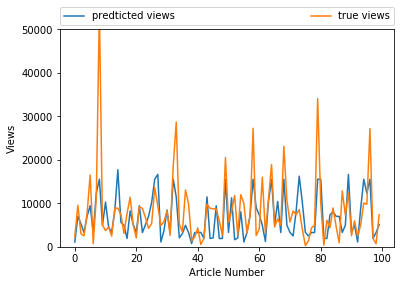

In [67]:
plt.plot(predictions[:100], label="predticted views")
plt.plot(y_test[:100], label="true views")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylim(0, 50000)
#plt.ylegend()
plt.xlabel("Article Number")
plt.ylabel("Views")

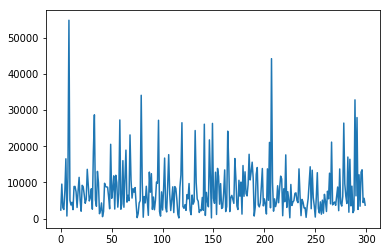

In [51]:
plt.plot(y_test)